In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
from datetime import datetime

In [2]:
items = {
    'DHW Avg (Divide by 7)': 'avgdiv7.csv',
    'DHW Avg (Divide by 2)': 'avgdiv2.csv',
    'DHW Avg (No Division)': 'avgnodiv.csv',
    'DHW Max (Divide by 7)': 'maxdiv7.csv',
    'DHW Max (Divide by 2)': 'maxdiv2.csv',
    'DHW Max (No Division)': 'maxnodiv.csv',
}

In [3]:
def convert_date(df):
    # Takes in dataframe, second columns contains the date (There are no column titles)
    # Convert the date, which is in format YYYYMMDD to YYYY-MM-DD
    # Second column is where the dates are located.
    df.iloc[:, 0] = df.iloc[:, 0].astype(str)
    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0], format='%Y%m%d').dt.strftime('%Y-%m-%d')
    
    return df

In [4]:
def getTicks(timespan, df):
        # Plot x-ticks based on timespan
        if timespan < 100:
            # Plot every 10 days in df 'date'
            return np.arange(0, timespan, 10), df['date'][::10]
        # now between 100 and 365, do it every 30 days
        elif timespan < 365 and timespan >= 100:
            return np.arange(0, timespan, 30), df['date'][::30]
        # Now between 365 and 730, do it every 60 days
        elif timespan < 730 and timespan >= 365:
            return np.arange(0, timespan, 60), df['date'][::60]
        # Now if greater than 730, do every 365 days
        else:
            return np.arange(0, timespan, 365), df['date'][::365]

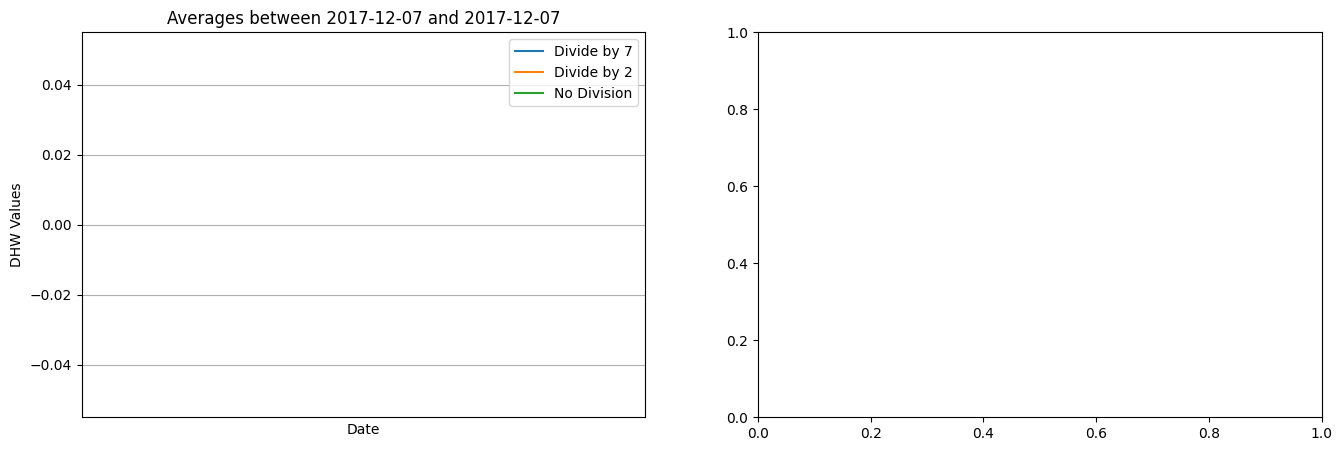

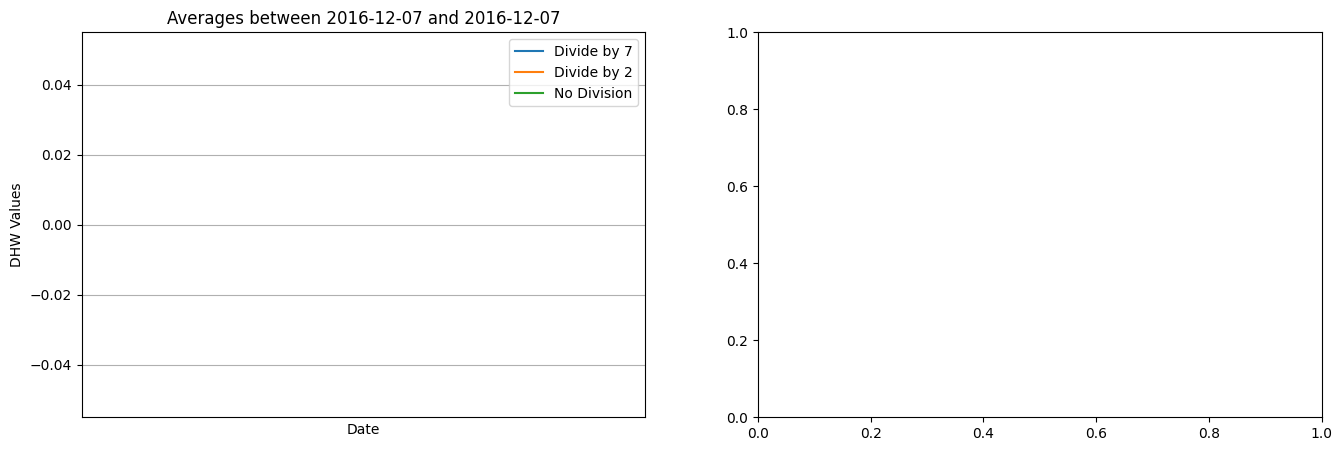

In [5]:
from ipywidgets import Button, interact, Dropdown, Text

# Create a ipywidget that is dropdown menu of items, specifically the keys
item = Dropdown(
    options=items.keys(),
    value='DHW Avg (Divide by 7)',
    description='Item:',
)

# Widget for start date, this should be a text box. Default text should be yyyymmdd
start_date = Text(
    value='20100401',
    description='Start Date:',
)

# Same thing for end date
end_date = Text(
    value='20110401',
    description='End Date:',
)

# 3 radio buttons, called: "One Graph", "Avg/Max", "All Divisions"
radio = widgets.RadioButtons(
    options=['One Graph', 'Avg/Max', 'All Divisions', 'Everything'],
    description='Graph Options:',
    disabled=False
)

start_button = Button(description='Run Analysis')

output = widgets.Output()

vboxlayout = widgets.Layout(display='flex',
                    flex_flow='column',
                    align_items='stretch',
                    width='90%')

vbox = widgets.VBox([item, start_date, end_date, radio, start_button, output], layout=vboxlayout)

def on_button_clicked(b):
    def run_analysis(item, start_date, end_date, radio):
        print(f'Item: {item} (Option Selected: {radio})')
        print('Start Date:', datetime.strptime(start_date, '%Y%m%d'))
        print('End Date:', datetime.strptime(end_date, '%Y%m%d'))
        
        # Using datetime, take the start_date (format: yyyymmdd) and find amount of days between start and 20100326
        start_date = datetime.strptime(start_date, '%Y%m%d')
        end_date = datetime.strptime(end_date, '%Y%m%d')
        total_timespan = (end_date - start_date).days
        time_start = (start_date - datetime(2010, 3, 26)).days
        
        print(f'Total Span of Time: {total_timespan} days.')
        
        if radio == 'One Graph':
            # plot item's value based on item, which is the key
            df = pd.read_csv(f'./csvfiles/{items[item]}')
            
            # Make the df go from the index of time_start to time_start + total_timespan
            df = df[time_start:time_start + total_timespan]
            
            return df, total_timespan

        elif radio == 'Avg/Max':
            # plot item's value based on item, which is the key
            df1 = pd.read_csv(f'./csvfiles/{items[item]}')
            df2 = pd.read_csv(f"./csvfiles/{items[item].replace('avg', 'max')}")
            
            # Make the df go from the index of time_start to time_start + total_timespan
            df1 = df1[time_start:time_start + total_timespan]
            df2 = df2[time_start:time_start + total_timespan]
            
            # Create a new column in df1 called 'max', setting equal to df2's 'sst' column
            df1['max'] = df2['sst']
            #print(df1)
            
            return df1, total_timespan

        elif radio == 'All Divisions':
            # Check to see if item contains 'Avg' or 'Max', then load all divisions of that item
            if 'Avg' in item:
                df1 = pd.read_csv(f'./csvfiles/avgdiv7.csv')
                df2 = pd.read_csv(f'./csvfiles/avgdiv2.csv')
                df3 = pd.read_csv(f'./csvfiles/avgnodiv.csv')
                
                # Make the df go from the index of time_start to time_start + total_timespan
                df1 = df1[time_start:time_start + total_timespan]
                df2 = df2[time_start:time_start + total_timespan]
                df3 = df3[time_start:time_start + total_timespan]
                
                # Change df1's sst to 'div7' (then delete sst), then create 2 new columns for df2 and df3, labeled 'div2' and 'nodiv'
                df1['div7'] = df1['sst']
                df1 = df1.drop(columns=['sst'])
                df1['div2'] = df2['sst']
                df1['nodiv'] = df3['sst']
                
                return df1, total_timespan
            else:
                df1 = pd.read_csv(f'./csvfiles/maxdiv7.csv')
                df2 = pd.read_csv(f'./csvfiles/maxdiv2.csv')
                df3 = pd.read_csv(f'./csvfiles/maxnodiv.csv')
                
                # Make the df go from the index of time_start to time_start + total_timespan
                df1 = df1[time_start:time_start + total_timespan]
                df2 = df2[time_start:time_start + total_timespan]
                df3 = df3[time_start:time_start + total_timespan]
                
                # Change df1's sst to 'div7' (then delete sst), then create 2 new columns for df2 and df3, labeled 'div2' and 'nodiv'
                df1['div7'] = df1['sst']
                df1 = df1.drop(columns=['sst'])
                df1['div2'] = df2['sst']
                df1['nodiv'] = df3['sst']
                
                return df1, total_timespan
        
        elif radio == 'Everything':
            # Load every file, replacing what needs to be replaced.
            # Avg
            df1 = pd.read_csv(f'./csvfiles/avgdiv7.csv')
            df2 = pd.read_csv(f'./csvfiles/avgdiv2.csv')
            df3 = pd.read_csv(f'./csvfiles/avgnodiv.csv')
            
            # Max
            df4 = pd.read_csv(f'./csvfiles/maxdiv7.csv')
            df5 = pd.read_csv(f'./csvfiles/maxdiv2.csv')
            df6 = pd.read_csv(f'./csvfiles/maxnodiv.csv')
            
            # Make the df go from the index of time_start to time_start + total_timespan
            df1 = df1[time_start:time_start + total_timespan]
            df2 = df2[time_start:time_start + total_timespan]
            df3 = df3[time_start:time_start + total_timespan]
            df4 = df4[time_start:time_start + total_timespan]
            df5 = df5[time_start:time_start + total_timespan]
            df6 = df6[time_start:time_start + total_timespan]
            
            # Change df1's sst to 'div7' (then delete sst), then create 2 new columns for df2 and df3, labeled 'div2' and 'nodiv'
            df1['avgdiv7'] = df1['sst']
            df1 = df1.drop(columns=['sst'])
            df1['avgdiv2'] = df2['sst']
            df1['avgnodiv'] = df3['sst']
            df1['maxdiv7'] = df4['sst']
            df1['maxdiv2'] = df5['sst']
            df1['maxnodiv'] = df6['sst']
            
            # Return
            return df1, total_timespan
            
    with output:
        output.clear_output(wait = True)
        df, timespan = run_analysis(item.value, start_date.value, end_date.value, radio.value)
        convert_date(df)
        
        # Convert start_date and end_date to datetime objects
        start_date1 = datetime.strptime(start_date.value, '%Y%m%d')
        end_date1 = datetime.strptime(end_date.value, '%Y%m%d')
        
        # Store these as strings
        start_date2 = start_date1.strftime('%Y-%m-%d')
        end_date2 = end_date1.strftime('%Y-%m-%d')
        
        if radio.value == 'One Graph':
            # plot df's 'sst' variable
            plt.plot(df['sst'])
        elif radio.value == 'Avg/Max':
            # plot df's 'sst' and 'max' variable
            plt.plot(df['sst'], label='Average')
            plt.plot(df['max'], label='Maximum')
            plt.legend()
        elif radio.value == 'All Divisions':
            # plot df's 'div7', 'div2', and 'nodiv' variable
            plt.plot(df['div7'], label='Divide by 7')
            plt.plot(df['div2'], label='Divide by 2')
            plt.plot(df['nodiv'], label='No Division')
            plt.legend()
        elif radio.value == 'Everything':
            # Create 2 subplots, one for average and one for maximum sixteen by five
            fig, axs = plt.subplots(1, 2, figsize=(16, 5))
            
            # Get values for the ticks
            valrange, ticks = getTicks(timespan, df)
            maxval = df[['avgdiv7', 'avgdiv2', 'avgnodiv', 'maxdiv7', 'maxdiv2', 'maxnodiv']].max().max() // 5 * 5 + 10
            
            # Plot average
            axs[0].plot(df['avgdiv7'], label='Divide by 7')
            axs[0].plot(df['avgdiv2'], label='Divide by 2')
            axs[0].plot(df['avgnodiv'], label='No Division')
            axs[0].legend()
            axs[0].set_title(f'Averages between {start_date2} and {end_date2}')
            axs[0].grid()
            axs[0].set_xticks(valrange, ticks, rotation=45)
            axs[0].set_xlabel('Date')
            axs[0].set_ylabel('DHW Values')
            axs[0].set_yticks(np.arange(0, maxval, 5))
            
            # Plot maximum
            axs[1].plot(df['maxdiv7'], label='Divide by 7')
            axs[1].plot(df['maxdiv2'], label='Divide by 2')
            axs[1].plot(df['maxnodiv'], label='No Division')
            axs[1].legend()
            axs[1].set_title(f'Maximums between {start_date2} and {end_date2}')
            axs[1].grid()
            axs[1].set_xticks(valrange, ticks, rotation=45)
            axs[1].set_xlabel('Date')
            axs[1].set_ylabel('DHW Values')
            axs[1].set_yticks(np.arange(0, maxval, 5))
            
            
        if radio.value == 'One Graph' or radio.value == 'Avg/Max' or radio.value == 'All Divisions':
            valrange, ticks = getTicks(timespan, df)
            plt.xticks(valrange, ticks, rotation=45)
        
        # Set title to be the item
        if radio.value == 'One Graph':
            name = item.value
            name = name.replace("Avg", "Average")
            name = name.replace("Max", "Maximum")
            plt.title(f'{name} between {start_date2} and {end_date2}')
        elif radio.value == 'Avg/Max':
            # Set name to whatever is between parentheses of item.value
            name = f'{item.value[item.value.find("(")+1:item.value.find(")")]}'
            name = name.replace("Divide by ", "")
            name = f'Division by {name}'
            plt.title(f'Average and Maximum for {name} between {start_date2} and {end_date2}')
        elif radio.value == 'All Divisions':
            name = (item.value.split(' ('))[0]
            plt.title(f'All Divisions for {name} between {start_date2} and {end_date2}')
            
        if radio.value == 'One Graph' or radio.value == 'Avg/Max' or radio.value == 'All Divisions':
            plt.xlabel('Date')
            plt.ylabel('DHW Values')
            plt.grid()
            
            # Make the plot pretty
            plt.tight_layout()
        
        plt.show()

# Now show everything in an interactive frame
start_button.on_click(on_button_clicked)
display(vbox)
